<a href="https://colab.research.google.com/github/robgon-art/stable-diffusion-portraiture/blob/main/3_Beautiful_Paintings_SD_XL_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from https://huggingface.co/stabilityai/stable-diffusion-xl-base-1.0

In [ ]:
from diffusers import StableDiffusionXLImg2ImgPipeline
from PIL import Image
import torch
from google.colab import userdata
hf_token = userdata.get('HF_TOKEN')

# Load Stable Diffusion XL 1.0 Img2Img model
pipe = StableDiffusionXLImg2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16, hf_token=hf_token
).to("cuda")


In [ ]:
!wget https://raw.githubusercontent.com/robgon-art/stable-diffusion-portraiture/refs/heads/main/2%20sd%202.1.png

--2025-03-10 04:32:52--  https://raw.githubusercontent.com/robgon-art/stable-diffusion-portraiture/refs/heads/main/2%20sd%202.1.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1406249 (1.3M) [image/png]
Saving to: ‘2 sd 2.1.png’

2 sd 2.1.png        100%[===================>]   1.34M  --.-KB/s    in 0.01s   

2025-03-10 04:32:53 (123 MB/s) - ‘2 sd 2.1.png’ saved [1406249/1406249]



  0%|          | 0/30 [00:00<?, ?it/s]

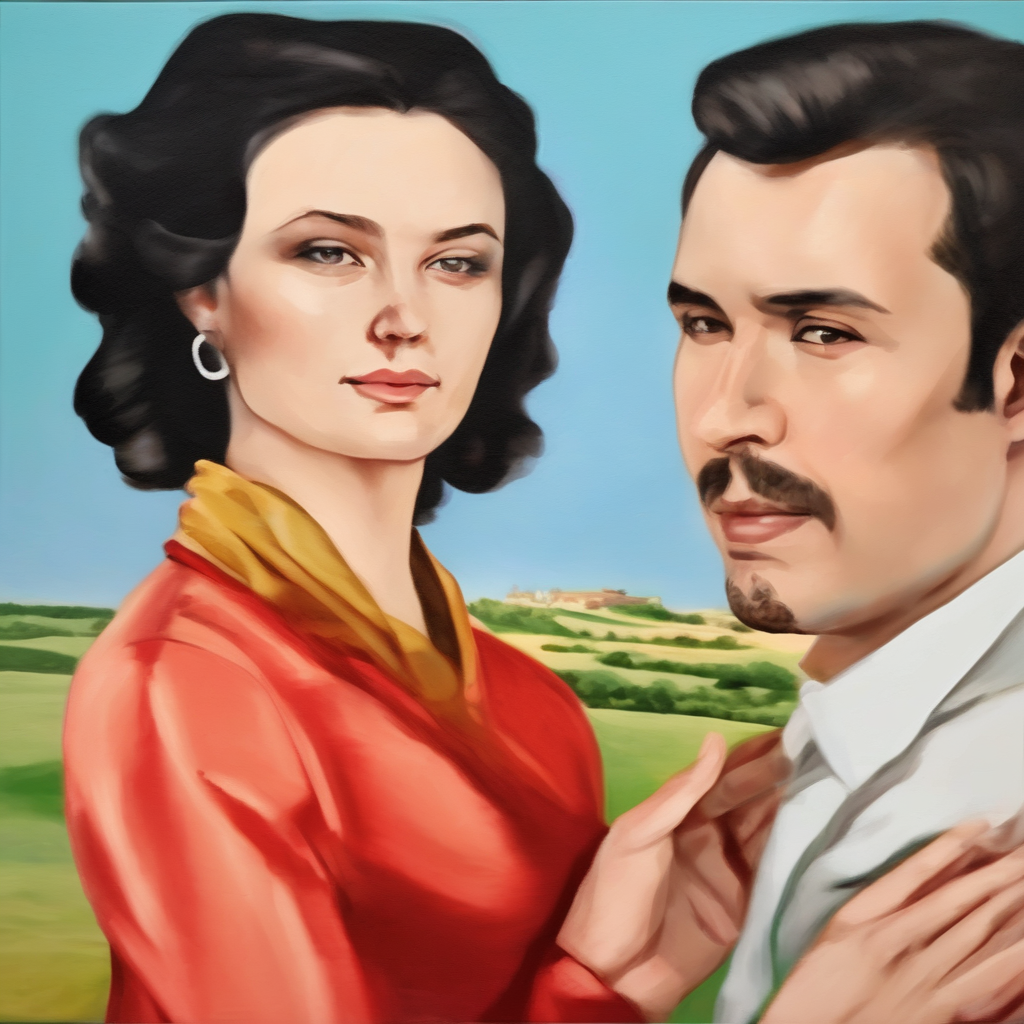

In [ ]:
# Load an input image
init_image = Image.open("2 sd 2.1.png").convert("RGB")
init_image = init_image.resize((1024, 1024))

# Set seed for reproducibility
torch.manual_seed(56)

# Generate a new image while keeping some structure
image = pipe(
    prompt="a beautiful painting of a man and a woman",
    image=init_image,
    strength=0.75,  # Controls how much the original image influences the output
    num_inference_steps=40,
    guidance_scale=4.5
).images[0]

image.save("3 sdxl 1.0.png")
image
